# Predizione della temperatura percepita
Basato sul dataset weatherHistory.csv <br>
Fonte dataset: Kaggle<br>
Rilevazioni intorno a Szeged (Ungheria)

## Analisi dataset 

In [2433]:
import pandas as pd
df = pd.read_csv('./weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2434]:
print('Dimensioni dataset:',df.shape)
print(df.dtypes)

Dimensioni dataset: (96453, 12)
Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [2435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


La colonna 'Precip Type' ha un conteggio diverso per 'Non-Null Count', vuol dire che contiene valori nulli.

In [2436]:
df.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [2437]:
print('Numero valori nulli in Precip Type:',df['Precip Type'].isnull().sum())

Numero valori nulli in Precip Type: 517


In [2438]:
df['Precip Type'].value_counts(dropna=False)

rain    85224
snow    10712
NaN       517
Name: Precip Type, dtype: int64

### Gestione dei valori nulli

Essendo 517 righe contenenti valori nulli per 'Precip Type' su 96453 totali, decido di rimuoverle.

In [2439]:
new_df = df.dropna()
print(new_df.shape)

(95936, 12)


In [2440]:
# Check risultato eliminazione valori nulli
new_df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [2441]:
new_df['Summary'].value_counts()

Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

<AxesSubplot:xlabel='Summary'>

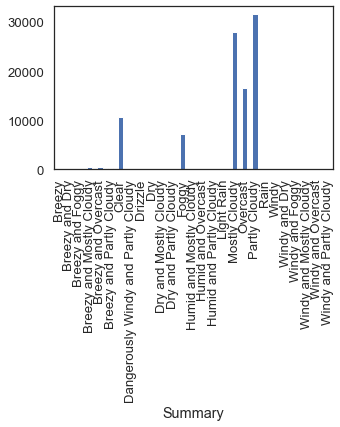

In [2442]:
new_df.groupby('Summary').size().plot(kind='bar')

### Valori duplicati
Controllo eventuali righe duplicate, se ci sono le rimuovo

In [2443]:
print('Numero di righe duplicate:',new_df.duplicated().sum())
new_df = new_df.drop_duplicates()
new_df = new_df.reset_index(drop=True)
print('Check numero di righe duplicate:',new_df.duplicated().sum())

Numero di righe duplicate: 24
Check numero di righe duplicate: 0


### Rimozione di eventuali colonne non interessanti

In [2444]:
print(df.dtypes)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


Decido di eliminare:
- Loud Cover --> ha tutti valori a zero
- Formatted Date --> non interessante ai fini del modello
- Daily Summary --> è sufficiente Summary

In [2445]:
print(new_df["Loud Cover"].describe())

count    95912.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Loud Cover, dtype: float64


In [2446]:
print(new_df["Formatted Date"].describe())

count                             95912
unique                            95912
top       2006-04-01 00:00:00.000 +0200
freq                                  1
Name: Formatted Date, dtype: object


In [2447]:
print(new_df["Daily Summary"].describe())

count                                 95912
unique                                  214
top       Mostly cloudy throughout the day.
freq                                  20020
Name: Daily Summary, dtype: object


In [2448]:
# Elimino colonne
new_df.drop('Loud Cover', axis=1, inplace=True)
new_df.drop('Formatted Date', axis=1, inplace=True)
new_df.drop('Daily Summary', axis=1, inplace=True)

In [2449]:
new_df.shape

(95912, 9)

Sono rimaste 9 colonne

### Gestione outliers
Controllo e gestisco eventuali valori outliers delle colonne numeriche

In [2450]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),95912.0,11.937975,9.569620,-21.822222,4.594444,12.022222,18.844444,39.905556
Apparent Temperature (C),95912.0,10.859194,10.716711,-27.716667,2.272222,12.022222,18.844444,39.344444
Humidity,95912.0,0.734844,0.195717,0.000000,0.600000,0.780000,0.890000,1.000000
Wind Speed (km/h),95912.0,10.806764,6.920504,0.000000,5.812100,9.933700,14.135800,63.852600
Wind Bearing (degrees),95912.0,187.506986,107.378309,0.000000,116.000000,180.000000,290.000000,359.000000
Visibility (km),95912.0,10.362306,4.174204,0.000000,8.355900,10.046400,14.812000,16.100000
Pressure (millibars),95912.0,1003.146959,117.291484,0.000000,1011.890000,1016.420000,1021.050000,1046.380000


In [2451]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

<AxesSubplot:>

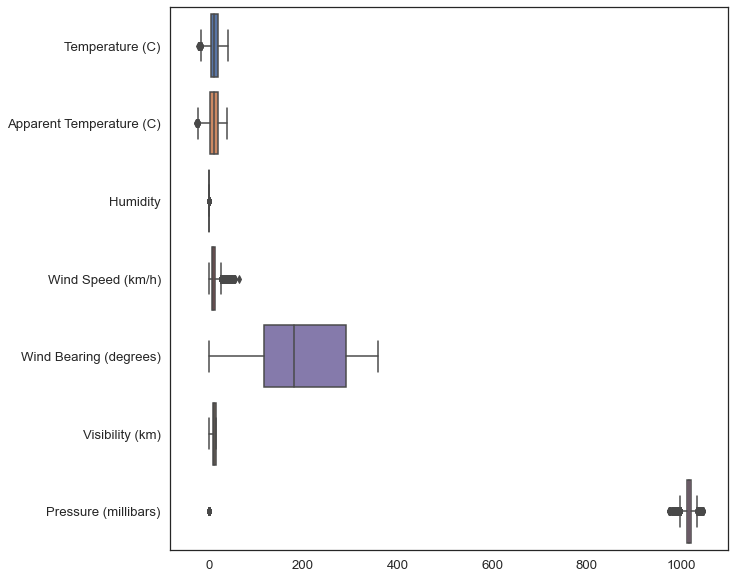

In [2452]:
# controllo tutte le colonne numeriche
sns.set_theme(rc={'figure.figsize':(10,10)}, font_scale=1.2, style='white')
df_numeric = new_df.drop(["Summary", "Precip Type"], axis=1)
sns.boxplot(data=df_numeric, orient="h")

<AxesSubplot:xlabel='Humidity'>

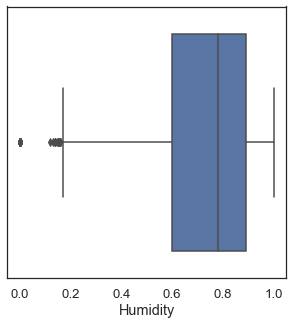

In [2453]:
sns.set_theme(rc={'figure.figsize':(5,5)}, font_scale=1.2, style='white')
sns.boxplot(x=new_df['Humidity'])

<AxesSubplot:xlabel='Pressure (millibars)'>

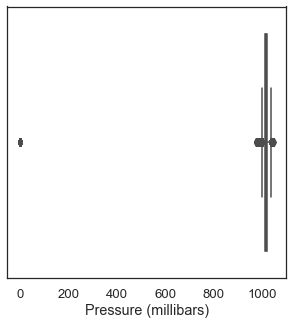

In [2454]:
sns.boxplot(x=new_df['Pressure (millibars)'])

<AxesSubplot:xlabel='Wind Speed (km/h)'>

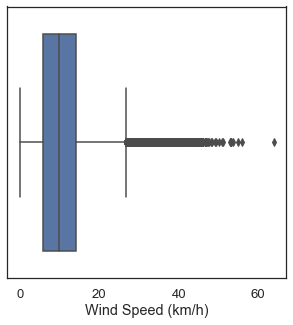

In [2455]:
sns.boxplot(x=new_df['Wind Speed (km/h)'])

Sistemo gli outliers di queste colonne, li rimuovo dal dataset.

0.16499999999999992 1.0
Dimensioni prima: (95912, 9)
Dimensioni dopo: (92979, 9)


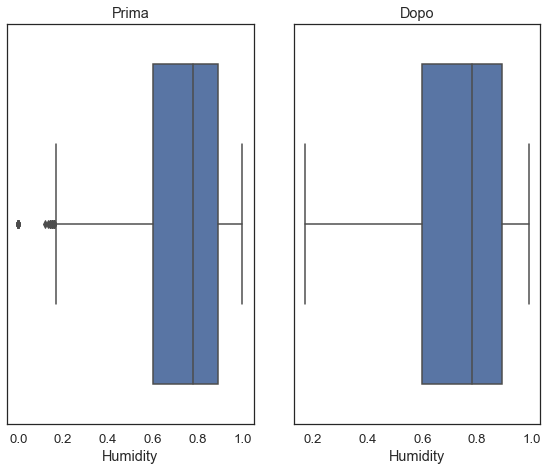

In [2456]:
Q1 = new_df['Humidity'].quantile(0.25)
Q3 = new_df['Humidity'].quantile(0.75)
IQR = Q3 - Q1
MIN = max(new_df['Humidity'].min(), Q1-1.5*IQR)
MAX = min(new_df['Humidity'].max(), Q3+1.5*IQR)
print(MIN, MAX)


data = new_df[(new_df['Humidity']>MIN) & (new_df['Humidity']<MAX)]
print("Dimensioni prima:",new_df.shape)
print("Dimensioni dopo:",data.shape)


sns.set_theme(rc={'figure.figsize':(8,6)}, font_scale=1.2, style='white')
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
sns.boxplot(new_df["Humidity"],orient='v',ax=axes[0])
axes[0].title.set_text("Prima")
sns.boxplot(data["Humidity"],orient='v',ax=axes[1])
axes[1].title.set_text("Dopo")
plt.show()



998.1500000000001 1034.79
Dimensioni prima: (95912, 9)
Dimensioni dopo: (88775, 9)


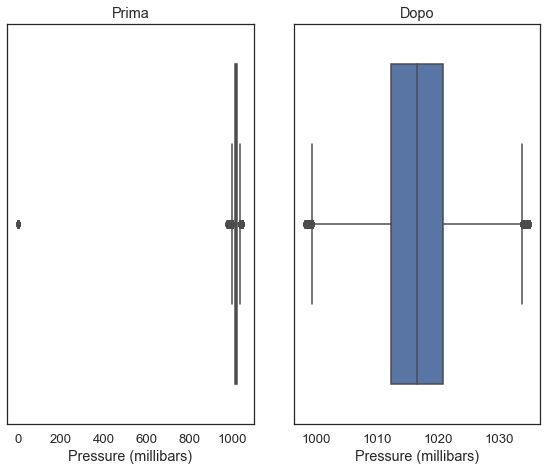

In [2457]:
Q1 = new_df['Pressure (millibars)'].quantile(0.25)
Q3 = new_df['Pressure (millibars)'].quantile(0.75)
IQR = Q3 - Q1
MIN = max(new_df['Pressure (millibars)'].min(), Q1-1.5*IQR)
MAX = min(new_df['Pressure (millibars)'].max(), Q3+1.5*IQR)
print(MIN, MAX)


data = data[(new_df['Pressure (millibars)']>MIN) & (data['Pressure (millibars)']<MAX)]
print("Dimensioni prima:",new_df.shape)
print("Dimensioni dopo:",data.shape)


sns.set_theme(rc={'figure.figsize':(8,6)}, font_scale=1.2, style='white')
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
sns.boxplot(new_df['Pressure (millibars)'],orient='v',ax=axes[0])
axes[0].title.set_text("Prima")
sns.boxplot(data['Pressure (millibars)'],orient='v',ax=axes[1])
axes[1].title.set_text("Dopo")
plt.show()

0.0 26.62135
Dimensioni prima: (95912, 9)
Dimensioni dopo: (84979, 9)


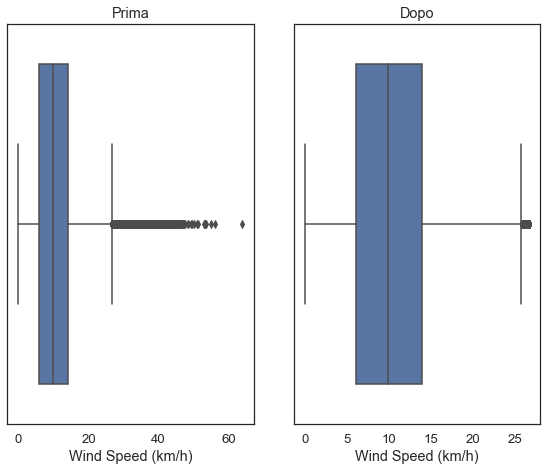

In [2458]:
Q1 = new_df['Wind Speed (km/h)'].quantile(0.25)
Q3 = new_df['Wind Speed (km/h)'].quantile(0.75)
IQR = Q3 - Q1
MIN = max(new_df['Wind Speed (km/h)'].min(), Q1-1.5*IQR)
MAX = min(new_df['Wind Speed (km/h)'].max(), Q3+1.5*IQR)
print(MIN, MAX)


data = data[(data['Wind Speed (km/h)']>MIN) & (data['Wind Speed (km/h)']<MAX)]
print("Dimensioni prima:",new_df.shape)
print("Dimensioni dopo:",data.shape)


sns.set_theme(rc={'figure.figsize':(8,6)}, font_scale=1.2, style='white')
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
sns.boxplot(new_df['Wind Speed (km/h)'],orient='v',ax=axes[0])
axes[0].title.set_text("Prima")
sns.boxplot(data['Wind Speed (km/h)'],orient='v',ax=axes[1])
axes[1].title.set_text("Dopo")
plt.show()

<AxesSubplot:>

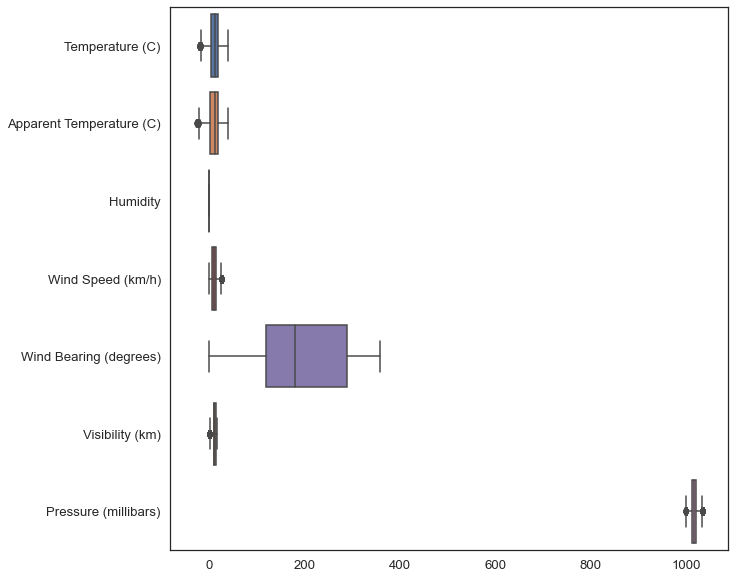

In [2459]:
new_df = data
sns.set_theme(rc={'figure.figsize':(10,10)}, font_scale=1.2, style='white')
df_numeric = new_df.drop(["Summary", "Precip Type"], axis=1)
sns.boxplot(data=df_numeric, orient="h")

### Gestione distribuzioni

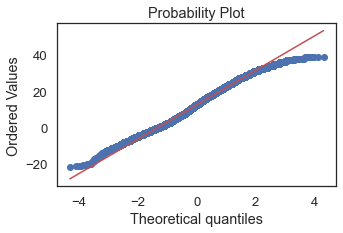

<AxesSubplot:xlabel='Temperature (C)', ylabel='Count'>

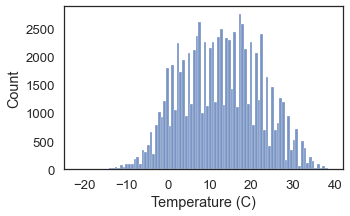

In [2460]:
import scipy.stats as stats

sns.set_theme(rc={'figure.figsize':(5,3)}, font_scale=1.2, style='white')
stats.probplot(new_df["Temperature (C)"], dist="norm", plot=plt)
plt.show()
sns.histplot(new_df["Temperature (C)"])


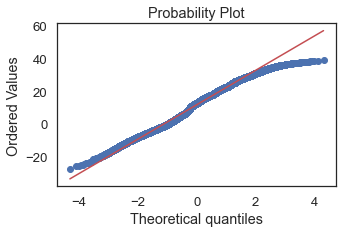

<AxesSubplot:xlabel='Apparent Temperature (C)', ylabel='Count'>

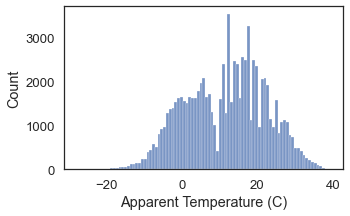

In [2461]:
stats.probplot(new_df["Apparent Temperature (C)"], dist="norm", plot=plt)
plt.show()
sns.histplot(new_df["Apparent Temperature (C)"])

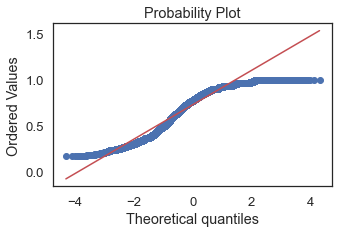

<AxesSubplot:xlabel='Humidity', ylabel='Count'>

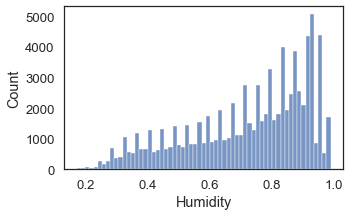

In [2462]:
stats.probplot(new_df["Humidity"], dist="norm", plot=plt)
plt.show()
sns.histplot(new_df["Humidity"])

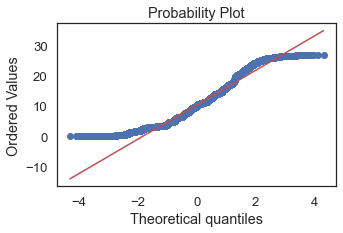

<AxesSubplot:xlabel='Wind Speed (km/h)', ylabel='Count'>

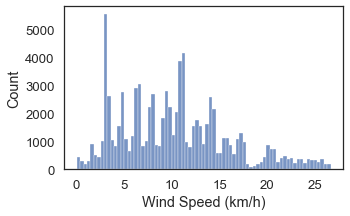

In [2463]:
stats.probplot(new_df["Wind Speed (km/h)"], dist="norm", plot=plt)
plt.show()
sns.histplot(new_df["Wind Speed (km/h)"])

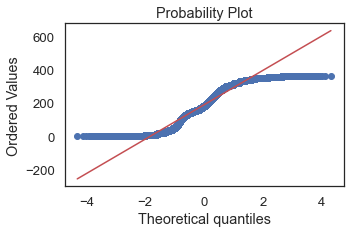

<AxesSubplot:xlabel='Wind Bearing (degrees)', ylabel='Count'>

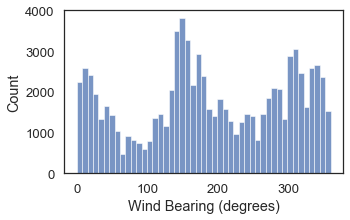

In [2464]:
stats.probplot(new_df["Wind Bearing (degrees)"], dist="norm", plot=plt)
plt.show()
sns.histplot(new_df["Wind Bearing (degrees)"])

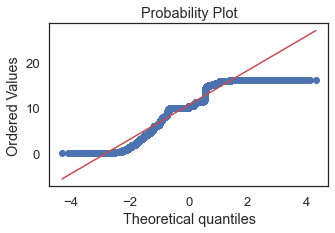

<AxesSubplot:xlabel='Visibility (km)', ylabel='Count'>

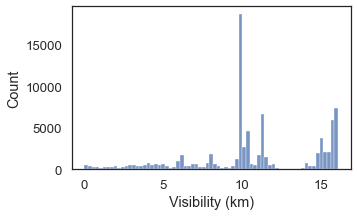

In [2465]:
stats.probplot(new_df["Visibility (km)"], dist="norm", plot=plt)
plt.show()
sns.histplot(new_df["Visibility (km)"])

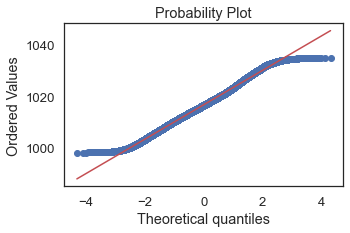

<AxesSubplot:xlabel='Pressure (millibars)', ylabel='Count'>

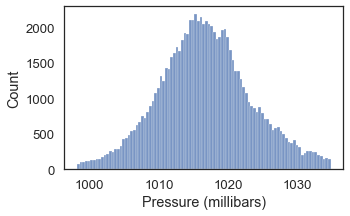

In [2466]:
stats.probplot(new_df["Pressure (millibars)"], dist="norm", plot=plt)
plt.show()
sns.histplot(new_df["Pressure (millibars)"])

Variabile da sistemare perchè non di distribuzione normale sono:
- Humidity
- Wind Speed (km/h)

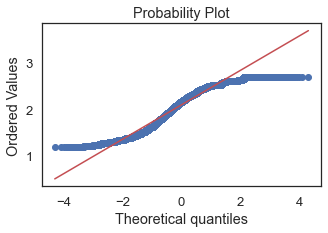

<AxesSubplot:xlabel='Humidity', ylabel='Count'>

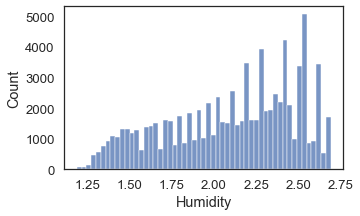

In [2467]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

columns = ['Humidity']
exponential_transformer = FunctionTransformer(np.exp, validate=True)

data_new = exponential_transformer.transform(new_df[columns])

new_df['Humidity'] = data_new

stats.probplot(new_df['Humidity'], dist="norm", plot=plt)
plt.show()
sns.histplot(new_df['Humidity'])

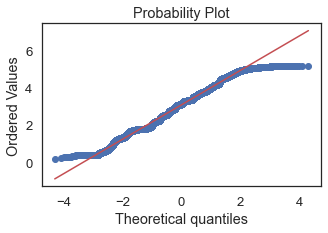

<AxesSubplot:xlabel='Wind Speed (km/h)', ylabel='Count'>

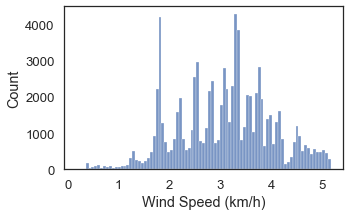

In [2468]:
columns = ['Wind Speed (km/h)']
square_root_transformation = FunctionTransformer(lambda x: np.sqrt(x), validate=True)

data_new = square_root_transformation.transform(new_df[columns])

new_df['Wind Speed (km/h)'] = data_new
stats.probplot(new_df['Wind Speed (km/h)'], dist="norm", plot=plt)
plt.show()
sns.histplot(new_df["Wind Speed (km/h)"])

### Trasformazione variabili categoriche

Nel dataset ci sono due variabili categoriche:
- Summary
- Precip Type

In [2469]:
new_df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy', 'Clear',
       'Humid and Mostly Cloudy', 'Humid and Partly Cloudy',
       'Dry and Partly Cloudy', 'Dry', 'Humid and Overcast', 'Light Rain',
       'Drizzle', 'Dry and Mostly Cloudy', 'Rain'], dtype=object)

In [2470]:
new_df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [2471]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_summary = le.fit_transform(new_df['Summary'])

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

new_df['Summary'] = new_summary


{'Clear': 0, 'Drizzle': 1, 'Dry': 2, 'Dry and Mostly Cloudy': 3, 'Dry and Partly Cloudy': 4, 'Foggy': 5, 'Humid and Mostly Cloudy': 6, 'Humid and Overcast': 7, 'Humid and Partly Cloudy': 8, 'Light Rain': 9, 'Mostly Cloudy': 10, 'Overcast': 11, 'Partly Cloudy': 12, 'Rain': 13}


In [2472]:
le_p = LabelEncoder()
new_precip_type = le_p.fit_transform(new_df['Precip Type'])


le_name_mapping = dict(zip(le_p.classes_, le_p.transform(le_p.classes_)))

print(le_name_mapping)

new_df['Precip Type'] = new_precip_type


{'rain': 0, 'snow': 1}


## Divisione train-test

### Standardizzazione delle feature 

In [2473]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature_columns = ['Apparent Temperature (C)','Temperature (C)', 'Wind Bearing (degrees)', 'Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']
scaled = sc.fit_transform(new_df[feature_columns])
new_df = pd.DataFrame(scaled, columns=feature_columns)
new_df['Summary'] = new_summary
new_df['Precip Type'] = new_precip_type
print(new_df.head())

   Apparent Temperature (C)  Temperature (C)  Wind Bearing (degrees)  \
0                 -0.399548        -0.330489                0.582146   
1                 -0.414731        -0.342772                0.657750   
2                 -0.212108        -0.340432                0.137974   
3                 -0.535677        -0.455073                0.752254   
4                 -0.438292        -0.405941                0.657750   

   Humidity  Wind Speed (km/h)  Visibility (km)  Pressure (millibars)  \
0  0.877870           0.727209         1.298229             -0.234158   
1  0.688571           0.747890         1.298229             -0.159254   
2  0.877870          -1.182276         1.078303             -0.112814   
3  0.504867           0.724904         1.298229             -0.042405   
4  0.504867           0.260186         1.298229             -0.027424   

   Summary  Precip Type  
0       12            0  
1       12            0  
2       10            0  
3       12            0 

In [2474]:
from sklearn.model_selection import train_test_split
df_X = new_df.drop('Apparent Temperature (C)', axis=1)
df_Y = new_df['Apparent Temperature (C)']

x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.2, random_state = 11)

x_train=x_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

### Matrice di Correlazione tra le feature

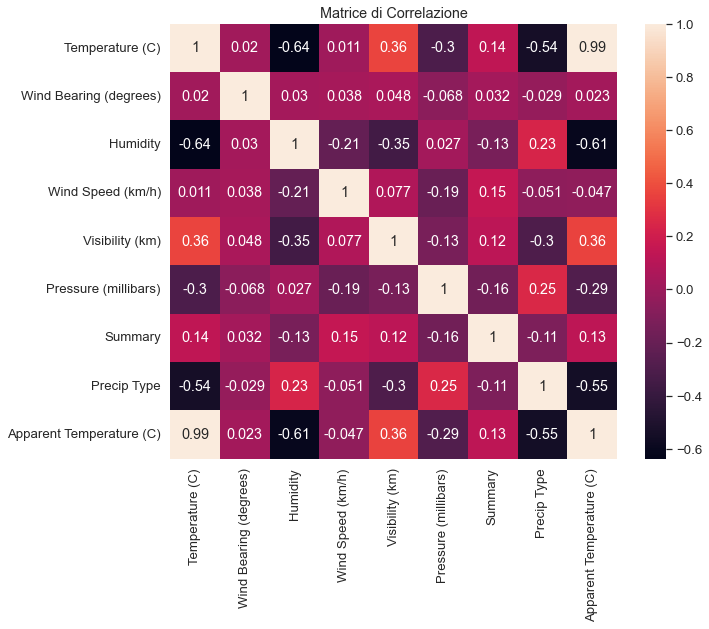

(84979, 9)


In [2475]:
# correlation matrix without target
df = x_train.join(y_train)
correlation_mat = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, annot = True)
plt.title("Matrice di Correlazione")
plt.show()
print(new_df.shape)

In [2476]:
x_train

,Temperature (C),Wind Bearing (degrees),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Summary,Precip Type
0,-0.184848,-0.769270,-0.387013,2.054960,1.355247,-0.744999,11,0
1,-0.404187,-1.648164,0.877870,-0.342946,1.241211,-1.249848,10,0
2,-0.567375,-0.277846,-0.488795,-1.384004,-0.180160,0.195788,10,0
3,-1.594467,-0.192792,0.814138,0.197111,-0.180160,-0.948736,0,1
4,-0.274923,-0.164441,-0.438158,0.900873,-0.180160,-1.616875,12,0
...,...,...,...,...,...,...,...,...
67978,0.904244,-1.411902,-1.794660,0.296470,1.367465,0.197286,12,0
67979,0.725263,0.515993,0.385424,-1.294421,1.367465,0.004035,10,0
67980,-0.556262,-1.317397,0.041099,-0.657283,1.078303,1.175524,10,0
67981,0.018699,1.423237,1.342290,0.666858,0.251546,-0.225169,10,0


## Modello

In [2477]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)

In [2478]:
# Testo il modello
predictions = lm.predict(x_test)
y_hat = pd.DataFrame(predictions, columns=["Apparent Temperature (C)"])

print(y_test.head(15))
print(y_hat.head(15))

0    -1.667123
1    -0.016291
2    -1.163444
3     0.522991
4     0.732421
5     0.176385
6    -0.057130
7     0.537651
8     0.909390
9    -1.535705
10    0.666451
11   -0.792229
12    2.043976
13   -1.389104
14    0.315132
Name: Apparent Temperature (C), dtype: float64
    Apparent Temperature (C)
0                  -1.514341
1                  -0.132119
2                  -1.085595
3                   0.467617
4                   0.808456
5                   0.186171
6                  -0.086400
7                   0.454044
8                   0.886746
9                  -1.338059
10                  0.619933
11                 -0.687166
12                  2.058776
13                 -1.396082
14                  0.178904


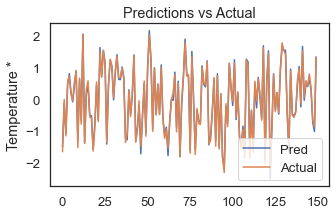

In [2479]:
plt.plot(y_hat[:150], label = "Pred")
plt.plot(y_test[:150], label = "Actual")
plt.xlabel('')
plt.ylabel('Temperature *')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()

In [2480]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse_for_model=mean_squared_error(y_test, y_hat)
print("Mean squared error : "+str(mse_for_model))

# Root Mean Squared Error
from math import sqrt
rmsq_for_model = sqrt(mean_squared_error(y_test, y_hat))
print("Root mean squared error : "+str(rmsq_for_model))

Mean squared error : 0.00869300161526218
Root mean squared error : 0.09323626770341131


In [2481]:
score = lm.score(x_test,y_test)
print("Coefficiente di determinazione R² : "+str(score * 100)+"%")

Coefficiente di determinazione R² : 99.1283157263404%


In [2482]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 8-fold cross validation
x = pd.DataFrame(x_train).append(pd.DataFrame(x_test)).reset_index(drop=True)
y = y_train.append(y_test).reset_index(drop=True)
scores = cross_val_score(model, x, y, cv=8)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.9911835  0.99108208 0.99129793 0.99124037 0.99128556 0.991225
 0.99113864 0.99128637]


In [2483]:
predictions = cross_val_predict(model, x, y, cv=6)
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.9912178014648927


## Test di predizione reale

In [2484]:
import numpy as np

feature_columns = ['Apparent Temperature (C)','Temperature (C)', 'Wind Bearing (degrees)', 'Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)','Summary', 'Precip Type']
scaler_columns = ['Apparent Temperature (C)','Temperature (C)', 'Wind Bearing (degrees)', 'Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']
data = {
    'Apparent Temperature (C)':[21],
    'Temperature (C)':[21], 
    'Wind Bearing (degrees)':[260.0], 
    'Humidity':[0.73],
    'Wind Speed (km/h)':[6.8],
    'Visibility (km)':[7],
    'Pressure (millibars)':[1012],
    'Summary':['Clear'], 
    'Precip Type':['rain']
    }

data['Humidity']= [np.exp(x) for x in data['Humidity']]
data['Wind Speed (km/h)']= [np.sqrt(x) for x in data['Wind Speed (km/h)']]
df_ = pd.DataFrame(data)
trasformed = sc.transform(df_[scaler_columns])

df_t = pd.DataFrame(trasformed, columns=scaler_columns)
df_t['Summary'] = le.transform(data['Summary'])
df_t['Precip Type'] = le_p.transform(data['Precip Type'])

print(df_t)
df_t.drop('Apparent Temperature (C)', axis = 1, inplace=True)

result = lm.predict(df_t)
print(result)
# result_scaled= sc.inverse_transform(result[0])
df_t['Apparent Temperature (C)'] =  result
unscaled = sc.inverse_transform(df_t[scaler_columns])
df_ = pd.DataFrame(unscaled, columns=scaler_columns)
print(df_)
print('Apparent Temperature (C) predetta:',df_['Apparent Temperature (C)'])

   Apparent Temperature (C)  Temperature (C)  Wind Bearing (degrees)  \
0                  0.883211         0.883188                  0.6672   

   Humidity  Wind Speed (km/h)  Visibility (km)  Pressure (millibars)  \
0 -0.069161          -0.509438        -0.934494             -0.703053   

   Summary  Precip Type  
0        0            0  
[0.91013728]
   Apparent Temperature (C)  Temperature (C)  Wind Bearing (degrees)  \
0                 21.285711             21.0                   260.0   

   Humidity  Wind Speed (km/h)  Visibility (km)  Pressure (millibars)  
0  2.075081           2.607681              7.0                1012.0  
Apparent Temperature (C) predetta: 0    21.285711
Name: Apparent Temperature (C), dtype: float64


In [2485]:
# Salvo modello 
from joblib import dump, load
import pickle

# save the model to disk
model_filename = '../flask/model.sav'
pickle.dump(model, open(model_filename, 'wb'))

In [2486]:
# Memorizzo Scaler ed Encoder per utilizzi esterni

dump(sc, '../flask/scaler.joblib')
dump(le, '../flask/encoder_summary.joblib')
dump(le_p, '../flask/encoder_precip_type.joblib')

['../flask/encoder_precip_type.joblib']

# Prove con classificatore

In [2487]:
df_X = new_df.drop('Summary', axis=1)
df_Y=new_df['Summary']
x_train,x_test,y_train,y_test=train_test_split(df_X,df_Y,train_size=0.8,random_state=10)

In [2488]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, accuracy_score
from xgboost import XGBClassifier


model1=XGBClassifier()
model1.fit(x_train,y_train)
predict=model1.predict(x_test)

In [2489]:
print(accuracy_score(y_test,predict)*100)

54.87173452577076


In [2490]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=20)


# fit the model
logreg.fit(x_train, y_train)
y_pred_test = logreg.predict(x_test)

y_pred_test

array([12, 11, 12, ..., 10, 12, 10])

In [2491]:
print(accuracy_score(y_test,y_pred_test)*100)

49.488114850553075
